In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving contentimage.jpg to contentimage (1).jpg
Saving monalisa.jpg to monalisa (1).jpg


In [ ]:

# Load content and style images
def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    img = img.convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.convert_to_tensor(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
def load_img(path_to_img, max_dim=512):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # add batch dimension
    return img



In [ ]:
content_image = load_img("contentimage.jpg" , max_dim = 256)
style_image = load_img("monalisa.jpg" , max_dim = 512)

In [ ]:
content_image.shape

TensorShape([1, 202, 256, 3])

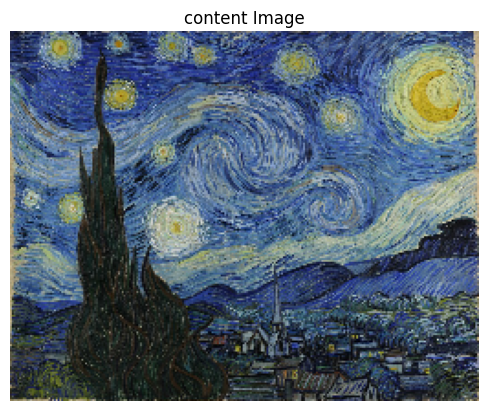

In [ ]:
#deplaying the content image
img = tf.squeeze(content_image).numpy()
img = np.clip(img, 0, 1)


plt.imshow(img)
plt.title("content Image")
plt.axis('off')
plt.show()

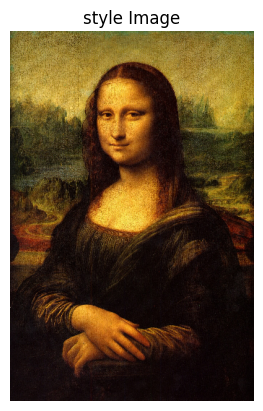

In [ ]:
#deplaying the style image
img = tf.squeeze(style_image).numpy()
img = np.clip(img, 0, 1)


plt.imshow(img)
plt.title("style Image")
plt.axis('off')
plt.show()

In [ ]:
# Load pretrained model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
# Apply style
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

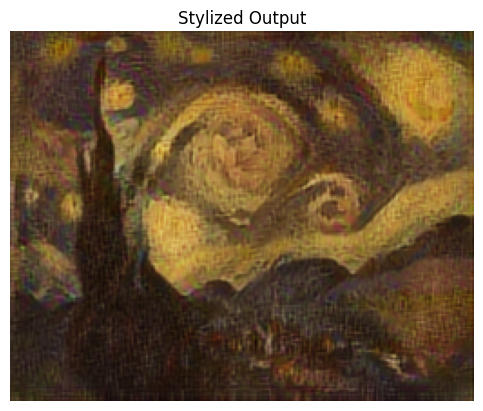

In [ ]:
# Display result
img = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)
img = tf.squeeze(img).numpy()

plt.imshow(img)
plt.title("Stylized Output")
plt.axis('off')
plt.show()